In [66]:
## 머신러닝

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [67]:
# 데이터 불러오기
df = pd.read_csv("../pythonwork/ai/data/data1/train.csv")

df.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch'],axis=1 ,inplace=True)


In [68]:
# 결측치 제거


df =df.dropna()

df

df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [69]:
# df1 = df.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch'],axis=1)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

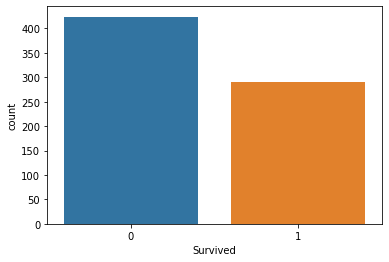

In [70]:
sns.countplot(df['Survived'])

#0 사망
#1 생존

In [71]:
train, test = train_test_split(df, test_size=0.2, random_state=2019)

# 훈련 0.8 , 테스트 0.2 를쓰겠다...

In [72]:
x_train = train.drop(['Survived'], axis=1)
y_train = train.Survived

# x -> y도출하고 싶은거닌깐 x에는 y가 없어야한다. 

x_test = test.drop(['Survived'],axis=1)
y_test = test.Survived

print(len(train),len(test)) #712개를 훈련시켜 179개를 시험해본다

571 143


# 1. SVM 서포트 벡터 머신

In [81]:

model = svm.SVC(gamma='scale')
model.fit(x_train,y_train)    #모델 학습(훈련)

y_pred = model.predict(x_test) # x테스트를 시험하면 y 가나온다.

print('SVM:', (metrics.accuracy_score(y_pred,y_test))) # 정확도 측정 

# y_pred 예측한값과 y_test의 정답값을 비교해서 그것의 차이를보여줘라



SVM: 0.6433566433566433


# 2.DecisionTreeClassifier

In [82]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('DecisionTreeClassifier:', (metrics.accuracy_score(y_pred,y_test)))

DecisionTreeClassifier: 0.6573426573426573


# 3.KNeighborsClassifier

In [83]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('KNeighborsClassifier:', (metrics.accuracy_score(y_pred,y_test)))

KNeighborsClassifier: 0.6293706293706294


# 4.LogisticRegression

In [84]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('LogisticRegression:', (metrics.accuracy_score(y_pred,y_test)))

LogisticRegression: 0.6573426573426573


# 5.RandomForestClassifier

In [85]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('RandomForestClassifier:', (metrics.accuracy_score(y_pred,y_test)))

RandomForestClassifier: 0.6643356643356644


# 매개변수 어떤게 중요한가? Features

In [88]:
features = pd.Series(
    model.feature_importances_,  #매개변수의 중요도 예상
    index=x_train.columns
).sort_values(ascending=False)

print(features)


#모델 변수에 있어 어떤 파라미터(매개변수) 가 중요한지 계산한다. 

Fare      0.467921
Age       0.421919
Pclass    0.110161
dtype: float64


# 가장 높은 feature 2개로 다시 해보기.

In [89]:
top2 = features.keys()[:2]

print(top2)

Index(['Fare', 'Age'], dtype='object')


In [90]:
model = svm.SVC(gamma='scale')
model.fit(x_train[top2], y_train)

y_pred = model.predict(x_test[top2])

print('SVM(Top 2):',(metrics.accuracy_score(y_pred, y_test) * 100))


# y_pred 예측한값과 y_test의 정답값을 비교해서 그것의 차이를보여줘라

SVM(Top 2): 64.33566433566433


# Cross Validaiton (Tedious) 교차 검증

### 데이터 셋이 적을때 쓴다...


In [91]:
# 긴코드


model = svm.SVC(gamma='scale')

cv = KFold(n_splits=5, shuffle=True, random_state=2019) # 총 5번 literation 5번을 돈다는뜻

accs = []

for train_index, test_index in cv.split(df[top2]):
    x_train = df.iloc[train_index][top2]
    y_train = df.iloc[train_index].Survived
    
    x_test = df.iloc[test_index][top2]
    y_test = df.iloc[test_index].Survived

    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    accs.append(metrics.accuracy_score(y_test, y_pred))

print(accs)

[0.6433566433566433, 0.6713286713286714, 0.6503496503496503, 0.6433566433566433, 0.6971830985915493]


In [95]:
# 짧은코드

model = svm.SVC(gamma='scale')

cv = KFold(n_splits=5,shuffle=True, random_state=2019)

accs = cross_val_score(model, df[top2], df.Survived, cv=cv)
                             # X데이터   Y데이터
print(accs)

[0.64335664 0.67132867 0.65034965 0.64335664 0.6971831 ]


# Test All models

In [97]:
models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5,shuffle=True, random_state=2019)

for name, model in models.items():
    scores = cross_val_score(model, df[top2], df.Survived, cv=cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores) * 100))

SVM: 66.11%
DecisionTreeClassifier: 63.17%
KNeighborsClassifier: 65.97%
LogisticRegression: 65.27%
RandomForestClassifier: 66.39%


# Normalize Dataset

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[top2])

models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5,shuffle=True, random_state=2019)

for name, model in models.items():
    scores = cross_val_score(model, scaled_data, df.Survived, cv=cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores) * 100))

SVM: 68.35%
DecisionTreeClassifier: 63.30%
KNeighborsClassifier: 63.87%
LogisticRegression: 63.59%
RandomForestClassifier: 65.83%
